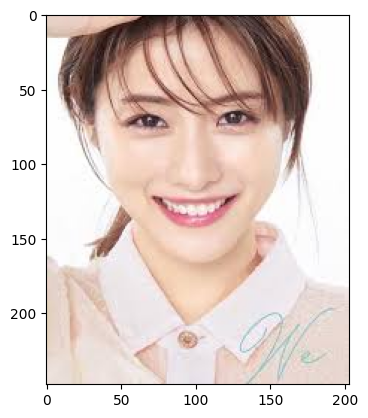

In [1]:
import matplotlib.pyplot as plt
import json
from lib.Smile import SMILE

input_path = "C:/Users/goode/Downloads/images.jpg"

image = plt.imread(input_path)


# 顯示背景圖片
plt.imshow(image)


In [3]:
nowfig=SMILE(input_path, device='cuda',filter=0.9)

nowfig.find_all_tooth()

print(nowfig.smile_info['error'])

output_path=c:\gits\SMILE_server\app/outputs/2024-08-02-04-09-07.jpg
using ESPCN_x3
SMILE_init
臉中線斜率m=18.343629343629463
boximg ok
found mouth

image 1/1 c:\gits\SMILE_server\app\outputs\2024-08-02-04-09-07.jpg: 224x640 1 tooth, 101.1ms
Speed: 2.0ms preprocess, 101.1ms inference, 48.3ms postprocess per image at shape (1, 3, 224, 640)
['tooth not found']


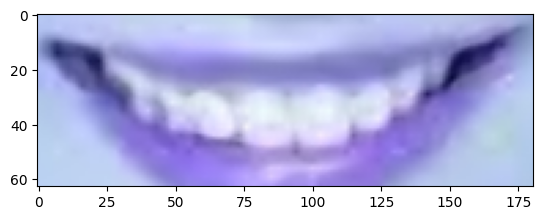

In [4]:
plt.imshow(nowfig.boximg)


In [5]:
nowfig.smile_info

{'image': {'width': 609, 'height': 744},
 'date': '2024-08-02 04:09:07',
 'error': ['tooth not found'],
 'mouth': [[0.363, 0.495],
  [0.386, 0.514],
  [0.403, 0.527],
  [0.426, 0.539],
  [0.455, 0.547],
  [0.49, 0.55],
  [0.527, 0.546],
  [0.558, 0.537],
  [0.584, 0.525],
  [0.602, 0.512],
  [0.626, 0.492],
  [0.608, 0.496],
  [0.587, 0.5],
  [0.561, 0.504],
  [0.53, 0.509],
  [0.491, 0.513],
  [0.454, 0.51],
  [0.425, 0.506],
  [0.401, 0.502],
  [0.381, 0.498]],
 'mouth_width': 161,
 'mouse_box': [10, 171, 10, 53],
 'tooth_boxes': []}

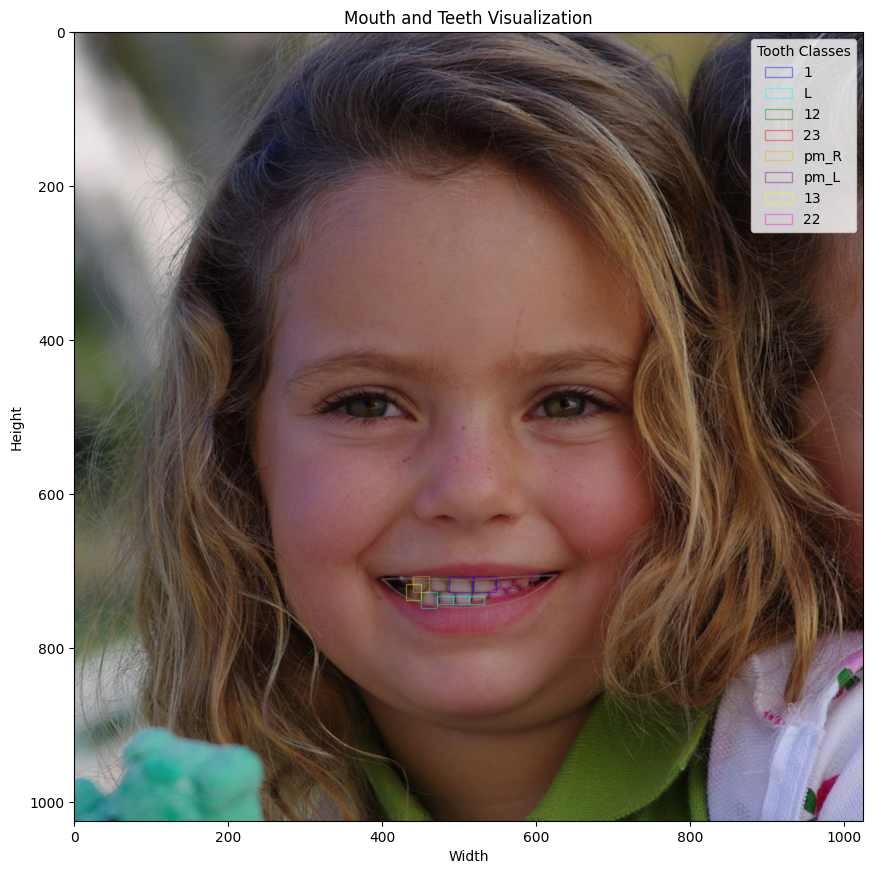

In [15]:
import json
import matplotlib.pyplot as plt

# 解析 JSON 字符串
smile_info = json.loads("""{
    "image": {"width": 1024, "height": 1024},
    "date": "2024-08-02 03:18:01",
    "error": [],
    "mouth": [[0.391, 0.694], [0.408, 0.709], [0.423, 0.718], [0.444, 0.725], [0.468, 0.729], [0.498, 0.73], [0.528, 0.727], 
              [0.554, 0.722], [0.576, 0.714], [0.592, 0.704], [0.611, 0.689], [0.597, 0.689], [0.579, 0.69], [0.558, 0.691], 
              [0.531, 0.693], [0.499, 0.695], [0.469, 0.694], [0.443, 0.693], [0.423, 0.693], [0.405, 0.693]],
    "mouth_width": 225,
    "mouse_box": [10, 235, 10, 52],
    "tooth_boxes": [[0.49, 0.7, 0.03, 0.02], [0.52, 0.7, 0.03, 0.02], [0.49, 0.72, 0.02, 0.01], [0.47, 0.72, 0.02, 0.01],
                    [0.46, 0.7, 0.02, 0.02], [0.57, 0.7, 0.02, 0.01], [0.51, 0.72, 0.02, 0.01], [0.45, 0.72, 0.02, 0.02], 
                    [0.44, 0.7, 0.02, 0.02], [0.58, 0.69, 0.01, 0.01], [0.55, 0.7, 0.02, 0.01], [0.43, 0.71, 0.02, 0.02], 
                    [0.54, 0.71, 0.02, 0.01], [0.56, 0.71, 0.02, 0.01]],
    "tooth_cls": ["1", "1", "L", "L", "12", "23", "L", "L", "pm_R", "pm_L", "pm_L", "13", "22", "pm_L"],
    "tooth_num": 14,
    "most_posterior_maxillary_teeth": 10,
    "arc_ratio": -141,
    "buccal_corridor": 23
}""")

# 提取圖像的寬度和高度
image_width = smile_info['image']['width']
image_height = smile_info['image']['height']

# 將相對坐標轉換為絕對坐標
def relative_to_absolute(coords, width, height):
    return [(x * width, y * height) for x, y in coords]

mouth_points = smile_info['mouth']
tooth_boxes = smile_info['tooth_boxes']
tooth_cls = smile_info['tooth_cls']

mouth_points_abs = relative_to_absolute(mouth_points, image_width, image_height)
mouth_points_abs.append(mouth_points_abs[0])
tooth_boxes_abs = relative_to_absolute([box[:2] for box in tooth_boxes], image_width, image_height)
tooth_sizes = [box[2:4] for box in tooth_boxes]

# 顏色映射字典
color_map = {
    'L': 'cyan',
    '1': 'blue',
    '12': 'green',
    '22': 'magenta',
    '13': 'yellow',
    '23': 'red',
    'pm_R': 'orange',
    'pm_L': 'purple'
}

# 加載背景圖片
background_image_path = "input.png"  # 替換為你的背景圖片路徑
background_image = plt.imread(background_image_path)

fig, ax = plt.subplots(figsize=(image_width / 100, image_height / 100), dpi=100)

# 顯示背景圖片
plt.imshow(background_image, extent=[0, image_width,  image_height, 0], origin='upper')

# 繪製口腔輪廓
mouth_x, mouth_y = zip(*mouth_points_abs)
ax.plot(mouth_x, mouth_y, marker='', linestyle='-', color='gray', alpha=0.4)

# 繪製牙齒並根據牙齒類別上色
handles = []
labels = []

for (x, y), (w, h), cls in zip(tooth_boxes_abs, tooth_sizes, tooth_cls):
    color = color_map.get(cls, 'gray')  # 默認顏色為灰色
    rect = plt.Rectangle((x - w * image_width / 2, y - h * image_height / 2), w * image_width, h * image_height, 
                         linewidth=1, edgecolor=color, facecolor='none', alpha=0.4)
    ax.add_patch(rect)
    if cls not in labels:
        handles.append(rect)
        labels.append(cls)

# 添加圖例
ax.legend(handles, labels, title='Tooth Classes')

# 設置圖形的範圍和標籤
ax.set_xlim(0, image_width)
ax.set_ylim(image_height, 0)

ax.set_title('Mouth and Teeth Visualization')
ax.set_xlabel('Width')
ax.set_ylabel('Height')

# 顯示圖形
plt.show()


output_path=c:\gits\SMILE_server\app/outputs/2024-08-03-02-40-41.png
SMILE_init
臉中線斜率m=2.067796610170784
boximg ok

image 1/1 c:\gits\SMILE_server\app\outputs\2024-08-03-02-40-41.png: 192x640 17 tooths, 98.4ms
Speed: 2.5ms preprocess, 98.4ms inference, 58.1ms postprocess per image at shape (1, 3, 192, 640)
incisor_lower_border-intercanine_line=-0.011005000000000043
mouse_lower_border-intercanine_line=0.008234999999999992
All tooth found and img output


{'image': {'width': 1024, 'height': 1024},
 'date': '2024-08-03 02:40:41',
 'error': [],
 'mouth': [[0.39078, 0.69439],
  [0.40835, 0.70904],
  [0.42305, 0.7178],
  [0.44367, 0.72471],
  [0.46834, 0.72882],
  [0.49757, 0.72994],
  [0.52846, 0.72724],
  [0.5543, 0.72172],
  [0.57603, 0.71368],
  [0.59205, 0.70416],
  [0.61128, 0.68859],
  [0.5965, 0.68886],
  [0.57882, 0.68957],
  [0.55766, 0.69072],
  [0.53147, 0.6927],
  [0.49942, 0.69496],
  [0.46882, 0.69368],
  [0.44342, 0.69272],
  [0.4229, 0.69256],
  [0.40526, 0.69305]],
 'mouth_box': [0.39078, 0.61128, 0.68859, 0.72994],
 'tooth_boxes': [[0.48887, 0.7021, 0.0293, 0.0172],
  [0.51969, 0.70252, 0.02726, 0.0156],
  [0.49407, 0.7181, 0.01892, 0.01372],
  [0.47297, 0.7166, 0.01838, 0.01484],
  [0.46248, 0.69988, 0.01943, 0.01626],
  [0.56841, 0.69755, 0.0169, 0.01314],
  [0.51468, 0.71587, 0.01812, 0.01017],
  [0.45137, 0.71578, 0.01888, 0.01789],
  [0.43842, 0.70008, 0.02182, 0.01844],
  [0.58401, 0.69185, 0.01331, 0.0087],
  [0.54

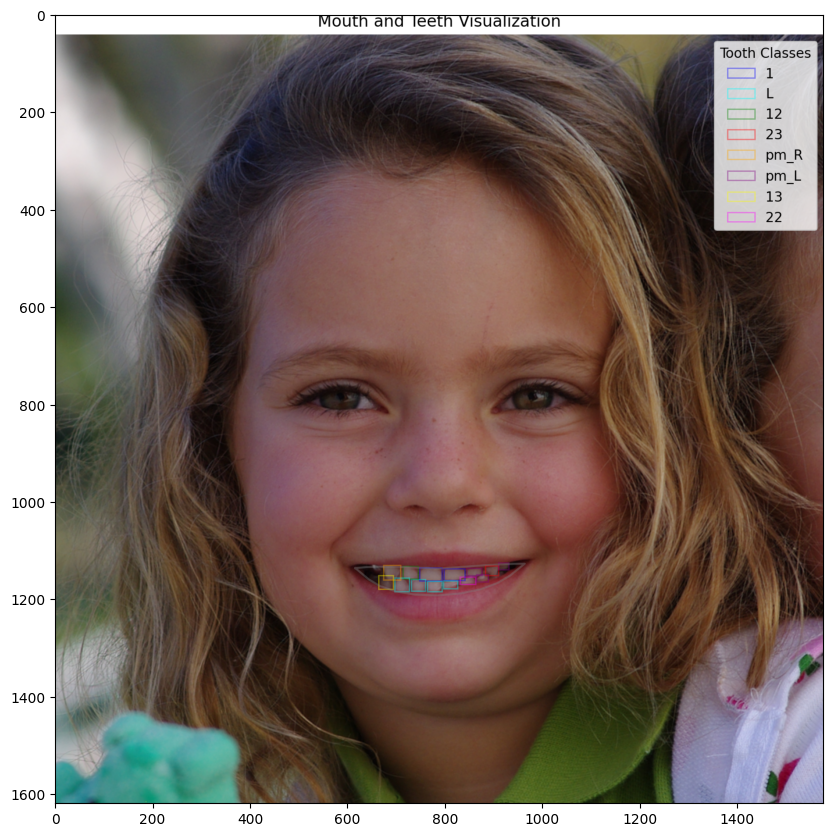

In [1]:
import matplotlib.pyplot as plt
from lib.Smile import SMILE

input_path = "input.png"

image = plt.imread(input_path)


# 顯示背景圖片
nowfig=SMILE(input_path, device='cuda',filter=0.9)

nowfig.find_all_tooth()
nowfig.draw_result()

plt.imshow(plt.imread(nowfig.output_path))
nowfig.smile_info

In [2]:
import numpy as np

def find_intersections(pol, a):
    intersections = []

    for i in range(len(pol)):
        # 取得多邊形的一條邊
        x1, y1 = pol[i]
        x2, y2 = pol[(i + 1) % len(pol)]
        
        # 檢查直線是否在邊的範圍內
        if (y1 <= a <= y2) or (y2 <= a <= y1):
            if y1 != y2:  # 避免垂直邊的除以零錯誤
                # 計算交點的 x 座標
                x_intersect = x1 + (a - y1) * (x2 - x1) / (y2 - y1)
                intersections.append((x_intersect, a))

    return intersections

teeth=nowfig.smile_info['tooth_boxes']

[find_intersections(nowfig.smile_info["mouth"], teeth[i][1] ) for i in range(len(teeth))]

[[(0.40002673720136517, 0.7021), (0.5945942389210019, 0.7021)],
 [(0.40053045051194547, 0.70252), (0.5940755105973025, 0.70252)],
 [(0.42394522431259035, 0.7181), (0.564083905472637, 0.7181)],
 [(0.42103630136986303, 0.7166), (0.5681380099502488, 0.7166)],
 [(0.39736425255972696, 0.69988), (0.5973360886319846, 0.69988)],
 [(0.394569843003413, 0.69755), (0.600213795761079, 0.69755)],
 [(0.419811301369863, 0.71587), (0.5701110074626866, 0.71587)],
 [(0.4196602739726027, 0.71578), (0.5703542537313434, 0.71578)],
 [(0.3976041160409557, 0.70008), (0.5970890751445086, 0.70008)],
 [(0.6072536801541427, 0.69185), (0.5427131818181822, 0.69185)],
 [(0.3963448327645052, 0.69903), (0.5983858959537572, 0.69903)],
 [(0.41477705479452054, 0.71287), (0.5773930462184874, 0.71287)],
 [(0.4108, 0.7105), (0.5813812184873949, 0.7105)],
 [(0.40601133105802045, 0.70709), (0.587119474789916, 0.70709)]]